# Archisha Sinha
# MBA Tech AI

## Domain: Reinforcement Learning
## Topic: Markov Decision Process

##**Markov Decision Process**
A Markov Decision Process (MDP) is a mathematical framework used to model decision-making in environments where outcomes are partly random and partly under the control of a decision-maker. MDPs provide a formalized way of dealing with situations where decisions need to be made sequentially over time, under uncertainty.


###**Key Components of MDPs**

An MDP is defined by the following components:

States (S):

The set of all possible situations or configurations in which the decision-maker can find themselves. Each state s∈S provides a complete description of the system at a particular time.

Actions (A):

The set of all possible actions that the decision-maker can take. For each state s∈S, there is a set of actions A(s) available. An action a∈A(s) chosen in a given state influences the next state of the system.

Transition Probabilities:

The transition probability P(s′∣s,a) represents the likelihood of moving from state s to state s′ when action a is taken. This property embodies the Markov property, which asserts that the future state s′ depends only on the current state s and action a, not on the history of past states or actions.

Rewards R(s,a,s′):

The reward function R(s,a,s′) specifies the immediate gain or cost received after transitioning from state s to state s′ via action a. This reward guides the decision-making process, as the goal is usually to maximize the cumulative reward over time.

Policy (π):

A policy π is a strategy or rule that specifies the action π(s) to be taken in each state s. The policy can be deterministic (mapping each state to a specific action) or stochastic (assigning probabilities to each action in a state).

Discount Factor (γ):

The discount factor γ, where 0≤γ<1, determines the importance of future rewards. A smaller γ means the decision-maker values immediate rewards more highly, while a γ closer to 1 places more emphasis on future rewards.


####Problem overview
We want to model a decision-making process where an individual must decide whether to take an umbrella or not based on the weather conditions. The weather can be in one of three states: Rainy, Sunny, or Cloudy. The actions available are either Take Umbrella or Don't Take Umbrella. The objective is to determine the optimal policy that minimizes discomfort (e.g., getting wet) and maximizes convenience (e.g., not carrying an umbrella unnecessarily).

####States: Rainy, Sunny, Cloudy

####Actions: Umbrella, No Umbrella

####Transition Probabilities:


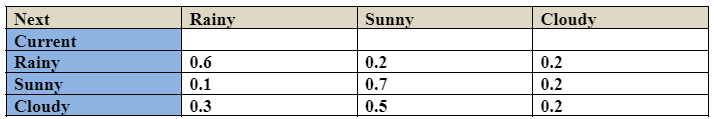

####Rewards R(s,a,s'):

The reward function reflects the immediate gain or loss from taking an action in a given state. The rewards are designed to encourage carrying an umbrella when it rains and discourage carrying it when it is unnecessary.

####Example of Rewards

- R(Rainy, Umbrella, Rainiy)=+1 (to stay dry)

- R(Rainy, No Umbrella, Rainiy)= -10 (you will get wet)

###Bellman Equation:
For each state s, the value is updated as follows-

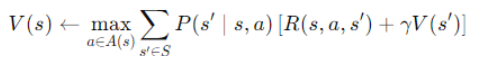

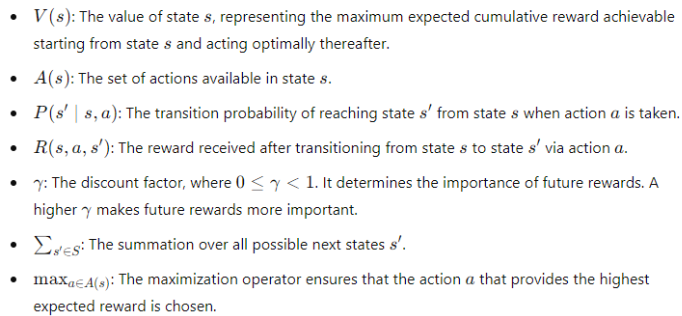

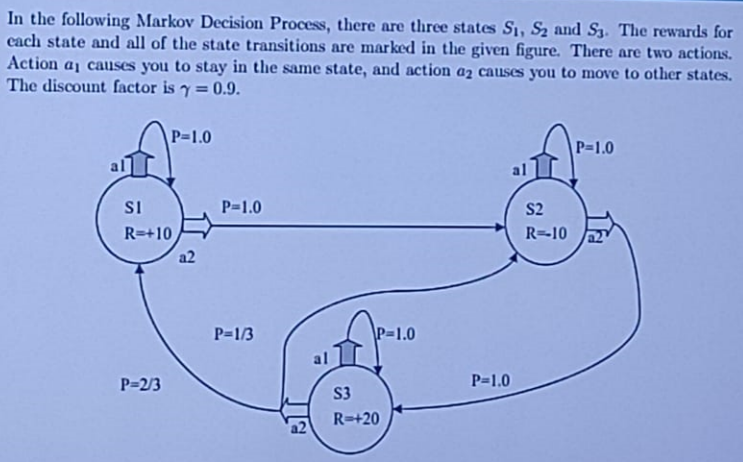

###**Step 1: Model the MDP**

In [ ]:
# States
states = ['S1', 'S2', 'S3']

In [ ]:
#Actions
actions = ['a1', 'a2']

In [ ]:
# Rewards for each state
rewards = {'S1': 10, 'S2': -10, 'S3': 20}

In [ ]:
# Transition probabilities (state, action) -> (next_state, probability)
transitions = {
    ('S1', 'a1'): {'S1': 1.0},
    ('S1', 'a2'): {'S2': 1.0},
    ('S2', 'a1'): {'S2': 1.0},
    ('S2', 'a2'): {'S3': 1.0},
    ('S3', 'a1'): {'S3': 1.0},
    ('S3', 'a2'): {'S1': 2/3, 'S2': 1/3}
}

In [ ]:
# Discount factor
gamma = 0.9

###**Step 2: Implement the Bellman Equation for Policy Iteration**

In [ ]:
# Initial value function for each state
V = {'S1': 0, 'S2': 0, 'S3': 0}

In [ ]:
# Initial policy
policy = {'S1': 'a1', 'S2': 'a1', 'S3': 'a1'}   #arbitrarily chosen, could be either a1 or a2 for each state

In [ ]:
# Policy iteration parameters
theta = 1e-6  # Small threshold for convergence

In [ ]:
# Policy Evaluation step
while True:
    delta = 0
    for state in states:
        v = V[state]
        action = policy[state]
        V[state] = sum([prob * (rewards[next_state] + gamma * V[next_state])
                        for next_state, prob in transitions[(state, action)].items()])
        delta = max(delta, abs(v - V[state]))
    if delta < theta:
        break

print("Value function after policy evaluation:")
print(V)

Value function after policy evaluation:
{'S1': 169.99999492674655, 'S2': 199.99999492674655, 'S3': 199.99999492674655}


In [ ]:
# Policy Improvement step
policy_stable = True
for state in states:
    old_action = policy[state]

    # One-step lookahead to find the best action according to the current value function
    action_values = {}
    for action in actions:
        action_values[action] = sum([prob * (rewards[next_state] + gamma * V[next_state])
                                     for next_state, prob in transitions[(state, action)].items()])

    # Select the action with the highest value
    best_action = max(action_values, key=action_values.get)
    policy[state] = best_action

    if old_action != best_action:
        policy_stable = False

print("Policy after improvement:")
print(policy)

Policy after improvement:
{'S1': 'a2', 'S2': 'a2', 'S3': 'a1'}


###**Step 3: Identify the Optimal Policy**

In [ ]:
while True:
    # Policy Evaluation
    while True:
        delta = 0
        for state in states:
            v = V[state]
            action = policy[state]
            V[state] = sum([prob * (rewards[next_state] + gamma * V[next_state])
                            for next_state, prob in transitions[(state, action)].items()])
            delta = max(delta, abs(v - V[state]))
        if delta < theta:
            break

    # Policy Improvement
    policy_stable = True
    for state in states:
        old_action = policy[state]

        action_values = {}
        for action in actions:
            action_values[action] = sum([prob * (rewards[next_state] + gamma * V[next_state])
                                         for next_state, prob in transitions[(state, action)].items()])

        best_action = max(action_values, key=action_values.get)
        policy[state] = best_action

        if old_action != best_action:
            policy_stable = False

    # If the policy is stable, then we have found the optimal policy
    if policy_stable:
        break

print("Optimal Value Function:")
print(V)

print("Optimal Policy:")
print(policy)

Optimal Value Function:
{'S1': 169.9999954340719, 'S2': 199.9999954340719, 'S3': 199.9999954340719}
Optimal Policy:
{'S1': 'a2', 'S2': 'a2', 'S3': 'a1'}
